# Project: classification

In [1]:
!pip freeze > requirements.txt

## Part 1. Lib import

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import IsolationForest, RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

from sklearn.metrics import classification_report, accuracy_score, f1_score

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

import time

import optuna

#import warnings
#warnings.filterwarnings('ignore')

### Visual settings

In [3]:
%matplotlib inline
plt.style.use('seaborn-v0_8')

## Part 2.  Data examination, empty cells and outliers

In [4]:
df = pd.read_csv('data/bank_fin.csv', sep = ';')

In [5]:
df.head()

age         job  marital  education default       balance housing loan  \
0   59      admin.  married  secondary      no   2 343,00 $      yes   no   
1   56      admin.  married  secondary      no      45,00 $       no   no   
2   41  technician  married  secondary      no   1 270,00 $      yes   no   
3   55    services  married  secondary      no   2 476,00 $      yes   no   
4   54      admin.  married   tertiary      no     184,00 $       no   no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may      1042         1     -1         0  unknown     yes  
1  unknown    5   may      1467         1     -1         0  unknown     yes  
2  unknown    5   may      1389         1     -1         0  unknown     yes  
3  unknown    5   may       579         1     -1         0  unknown     yes  
4  unknown    5   may       673         2     -1         0  unknown     yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [7]:
df.describe(include='all')

age         job  marital  education default balance housing  \
count   11162.000000       11162    11162      11162   11162   11137   11162   
unique           NaN          12        3          4       2    3802       2   
top              NaN  management  married  secondary      no   0  $       no   
freq             NaN        2566     6351       5476   10994     774    5881   
mean       41.231948         NaN      NaN        NaN     NaN     NaN     NaN   
std        11.913369         NaN      NaN        NaN     NaN     NaN     NaN   
min        18.000000         NaN      NaN        NaN     NaN     NaN     NaN   
25%        32.000000         NaN      NaN        NaN     NaN     NaN     NaN   
50%        39.000000         NaN      NaN        NaN     NaN     NaN     NaN   
75%        49.000000         NaN      NaN        NaN     NaN     NaN     NaN   
max        95.000000         NaN      NaN        NaN     NaN     NaN     NaN   

         loan   contact           day  month      duration      campaign  \
count   11162     11162  11162.000000  11162  11162.000000  11162.000000   
unique      2         3           NaN     12           NaN           NaN   
top        no  cellular           NaN    may           NaN           NaN   
freq     9702      8042           NaN   2824           NaN           NaN   
mean      NaN       NaN     15.658036    NaN    371.993818      2.508421   
std       NaN       NaN      8.420740    NaN    347.128386      2.722077   
min       NaN       NaN      1.000000    NaN      2.000000      1.000000   
25%       NaN       NaN      8.000000    NaN    138.000000      1.000000   
50%       NaN       NaN     15.000000    NaN    255.000000      2.000000   
75%       NaN       NaN     22.000000    NaN    496.000000      3.000000   
max       NaN       NaN     31.000000    NaN   3881.000000     63.000000   

               pdays      previous poutcome deposit  
count   11162.000000  11162.000000    11162   11162  
unique           NaN           NaN        4       2  
top              NaN           NaN  unknown      no  
freq             NaN           NaN     8326    5873  
mean       51.330407      0.832557      NaN     NaN  
std       108.758282      2.292007      NaN     NaN  
min        -1.000000      0.000000      NaN     NaN  
25%        -1.000000      0.000000      NaN     NaN  
50%        -1.000000      0.000000      NaN     NaN  
75%        20.750000      1.000000      NaN     NaN  
max       854.000000     58.000000      NaN     NaN

### Task 2.1

In [8]:
df.isnull().sum().sort_values(ascending=False)

balance      25
age           0
day           0
poutcome      0
previous      0
pdays         0
campaign      0
duration      0
month         0
contact       0
job           0
loan          0
housing       0
default       0
education     0
marital       0
deposit       0
dtype: int64

### Task 2.2

In [9]:
df['job'].value_counts(ascending=False)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

'unknown' is for empty-like cells for 'job' feature.

In [10]:
df[df == 'unknown'].notna().sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

Here we have all the cells with 'unknown' value.

In [11]:
df['education'].value_counts(ascending=False)

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

'unknown' is for empty-like cells for 'education' feature.

In [12]:
df['contact'].value_counts(ascending=False)

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

For 'contact' feature we have 'unknown' for all other types of contact.

In [13]:
df['duration'].value_counts(normalize=True)

97      0.003494
161     0.003404
158     0.003315
119     0.003315
150     0.003315
          ...   
915     0.000090
2029    0.000090
1499    0.000090
1399    0.000090
1812    0.000090
Name: duration, Length: 1428, dtype: float64

Probably, we should take into consideration that short duration of contact means no contact.

In [14]:
df['poutcome'].value_counts(ascending=False)

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

'unknown' is for empty-like cells for 'poutcome' feature.   
We should left it as a separate category becouse previous outcome could be unknown for real - no feedback from client for example. Or previous campaign was over bofore feedback was obtained.

### Task 2.3
Balance feature trasformation

In [15]:
df['balance'].value_counts()

0  $            774
 1,00 $          39
 3,00 $          34
 2,00 $          34
 4,00 $          29
               ... 
 1 641,00 $       1
 5 517,00 $       1
 8 332,00 $       1
 4 859,00 $       1
-134,00 $         1
Name: balance, Length: 3802, dtype: int64

In [16]:
df['balance'] = df['balance'].apply(lambda x: x if x is np.nan else x.split('$')[0].replace(' ','').replace(',','.')).astype('float')

In [17]:
df['balance'].mean()

1529.1290293615875

### Task 2.4
Balance empty cells filling

In [18]:
df.loc[(df['balance'].isnull() == True), 'balance'] = df['balance'].median()

In [19]:
df['balance'].mean()

1526.9360329690019

### Task 2.5
'inknown' cells filling.

In [20]:
df.loc[(df['job'] == 'unknown'), 'job'] = df['job'].mode().values[0]
df.loc[(df['education'] == 'unknown'), 'education'] = df['education'].mode().values[0]

In [21]:
mask1 = (df['job'] == df['job'].mode().values[0])
mask2 = (df['education'] == df['education'].mode().values[0])

round(df[mask1 & mask2]['balance'].mean(),3)

1598.883

### Tasks 2.6, 2.7

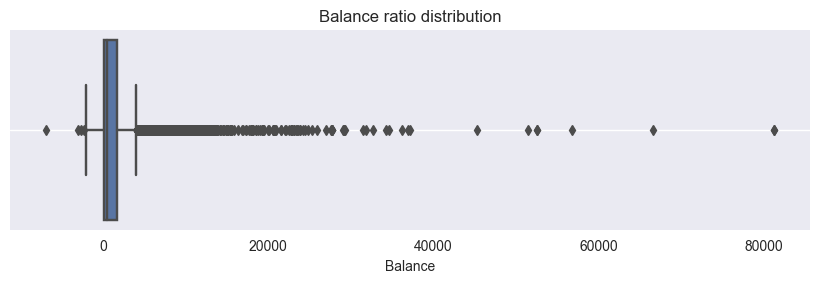

In [22]:
fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes((1, 1, 1, 1))

boxplot = sns.boxplot(
    data=df,
    x='balance',
    orient='h',
    width=0.9,
    ax = axes
)
boxplot.set_title('Balance ratio distribution');
boxplot.set_xlabel('Balance');
boxplot.grid()

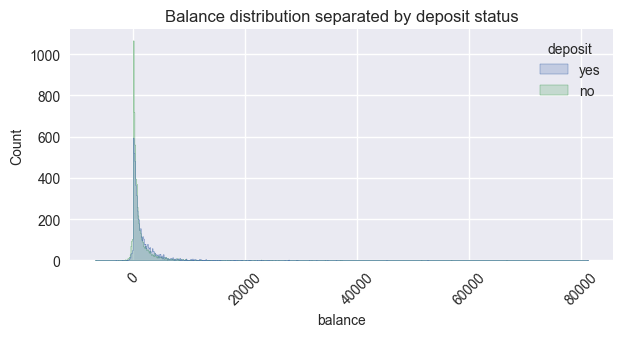

In [23]:
fig, axes = plt.subplots(figsize=(7, 3))

histplot = sns.histplot(data=df, x='balance', hue = 'deposit', element = 'step', ax=axes)
#Добавляем подпись графику
histplot.set_title('Balance distribution separated by deposit status')
#Добавляем поворот отметок на оси абсцисс
histplot.xaxis.set_tick_params(rotation=45)

In [24]:
display(df['balance'].quantile(0.25) - 1.5 * (df['balance'].quantile(0.75) - df['balance'].quantile(0.25)))
display(df['balance'].quantile(0.75) + 1.5 * (df['balance'].quantile(0.75) - df['balance'].quantile(0.25)))

-2241.0

4063.0

In [25]:
def outliers_iqr_mod(data, feature, log_scale = False, left = 1.5, right = 1.5):
    """Outliers detection using Tukey method

    Args:
        data (Dataframe): Dataframe name
        feature (string): Column name
        log_scale (bool, optional): Logarithm scaling option. Defaults to False.
        left (float, optional): Left border multiplyer. Defaults to 1.5.
        right (float, optional): Right border multiplyer. Defaults to 1.5.

    Returns:
        Dataframe, Dataframe: Resulting dataframes separated by outlying values in target column
    """
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [26]:
outliers, cleaned = outliers_iqr_mod(df, 'balance')
print(f'Tukey outlier number: {outliers.shape[0]}')
print(f'The resulting number of records: {cleaned.shape[0]}')

Tukey outlier number: 1057
The resulting number of records: 10105


In [27]:
df_cleaned = cleaned.copy()

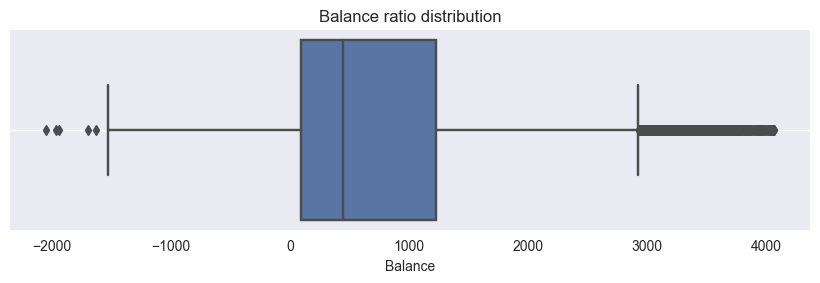

In [28]:
fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes((1, 1, 1, 1))

boxplot = sns.boxplot(
    data=df_cleaned,
    x='balance',
    orient='h',
    width=0.9,
    ax = axes
)
boxplot.set_title('Balance ratio distribution');
boxplot.set_xlabel('Balance');
boxplot.grid()

### Update
I think we should separate positive and negative balance into two stand-alone features.   
There always are difference in behavior of creditors and debetors.

In [29]:
df_cleaned['balance_pos'] = df_cleaned['balance'].apply(lambda x: x if x > 0 else 0)
df_cleaned['balance_neg'] = df_cleaned['balance'].apply(lambda x: (-1) * x if x < 0 else 0)

## Part 3. Exploratory data analysis

In [30]:
del_columns = ['balance']

In [31]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10105 non-null  int64  
 1   job          10105 non-null  object 
 2   marital      10105 non-null  object 
 3   education    10105 non-null  object 
 4   default      10105 non-null  object 
 5   balance      10105 non-null  float64
 6   housing      10105 non-null  object 
 7   loan         10105 non-null  object 
 8   contact      10105 non-null  object 
 9   day          10105 non-null  int64  
 10  month        10105 non-null  object 
 11  duration     10105 non-null  int64  
 12  campaign     10105 non-null  int64  
 13  pdays        10105 non-null  int64  
 14  previous     10105 non-null  int64  
 15  poutcome     10105 non-null  object 
 16  deposit      10105 non-null  object 
 17  balance_pos  10105 non-null  float64
 18  balance_neg  10105 non-null  float64
dtypes: f

### Task 3.1

Text(0.5, 1.0, 'deposit values count')

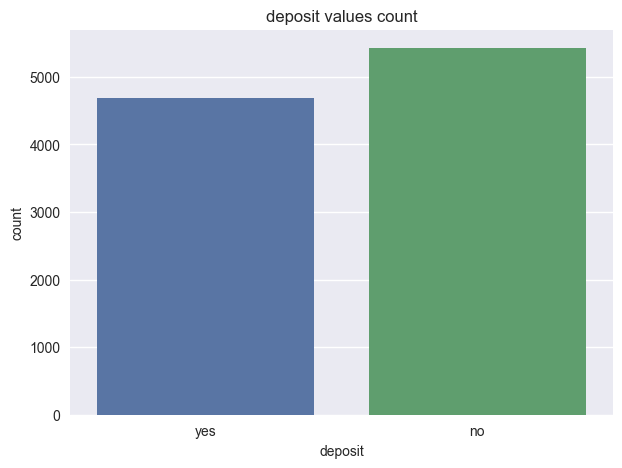

In [32]:
fig, axes = plt.subplots(figsize=(7, 5))

countplot = sns.countplot(data = df_cleaned, x = 'deposit', ax = axes)

countplot.set_title('deposit values count')

Classes are ballanced, but not so well.

In [33]:
(df_cleaned['deposit'] == 'yes').sum()

4681

Text(0.5, 1.0, 'Previous campaign outcome values count')

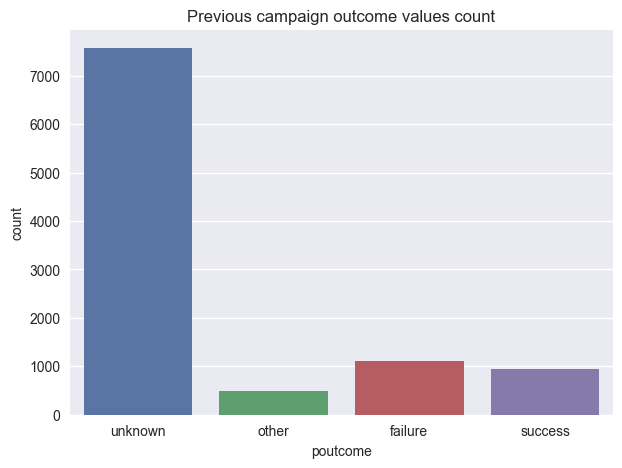

In [34]:
fig, axes = plt.subplots(figsize=(7, 5))

countplot = sns.countplot(data = df_cleaned, x = 'poutcome', ax = axes)

countplot.set_title('Previous campaign outcome values count')

### Task 3.2, 3,3

In [35]:
df_cleaned.describe()

age       balance           day      duration      campaign  \
count  10105.000000  10105.000000  10105.000000  10105.000000  10105.000000   
mean      40.895497    807.653538     15.590302    368.742603      2.517170   
std       11.734931    994.151966      8.441510    346.651524      2.707159   
min       18.000000  -2049.000000      1.000000      2.000000      1.000000   
25%       32.000000     95.000000      8.000000    137.000000      1.000000   
50%       38.000000    445.000000     15.000000    252.000000      2.000000   
75%       48.000000   1227.000000     22.000000    490.000000      3.000000   
max       95.000000   4063.000000     31.000000   3881.000000     43.000000   

              pdays      previous   balance_pos   balance_neg  
count  10105.000000  10105.000000  10105.000000  10105.000000  
mean      51.319644      0.816230    828.195547     20.542009  
std      109.644179      2.243795    970.837526    108.552575  
min       -1.000000      0.000000      0.000000      0.000000  
25%       -1.000000      0.000000     95.000000      0.000000  
50%       -1.000000      0.000000    445.000000      0.000000  
75%        2.000000      1.000000   1227.000000      0.000000  
max      854.000000     58.000000   4063.000000   2049.000000

In [36]:
num_columns = list(df_cleaned.select_dtypes(include = 'number').columns)
num_columns

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'balance_pos',
 'balance_neg']

In [37]:
count_columns = ['day', 'campaign']

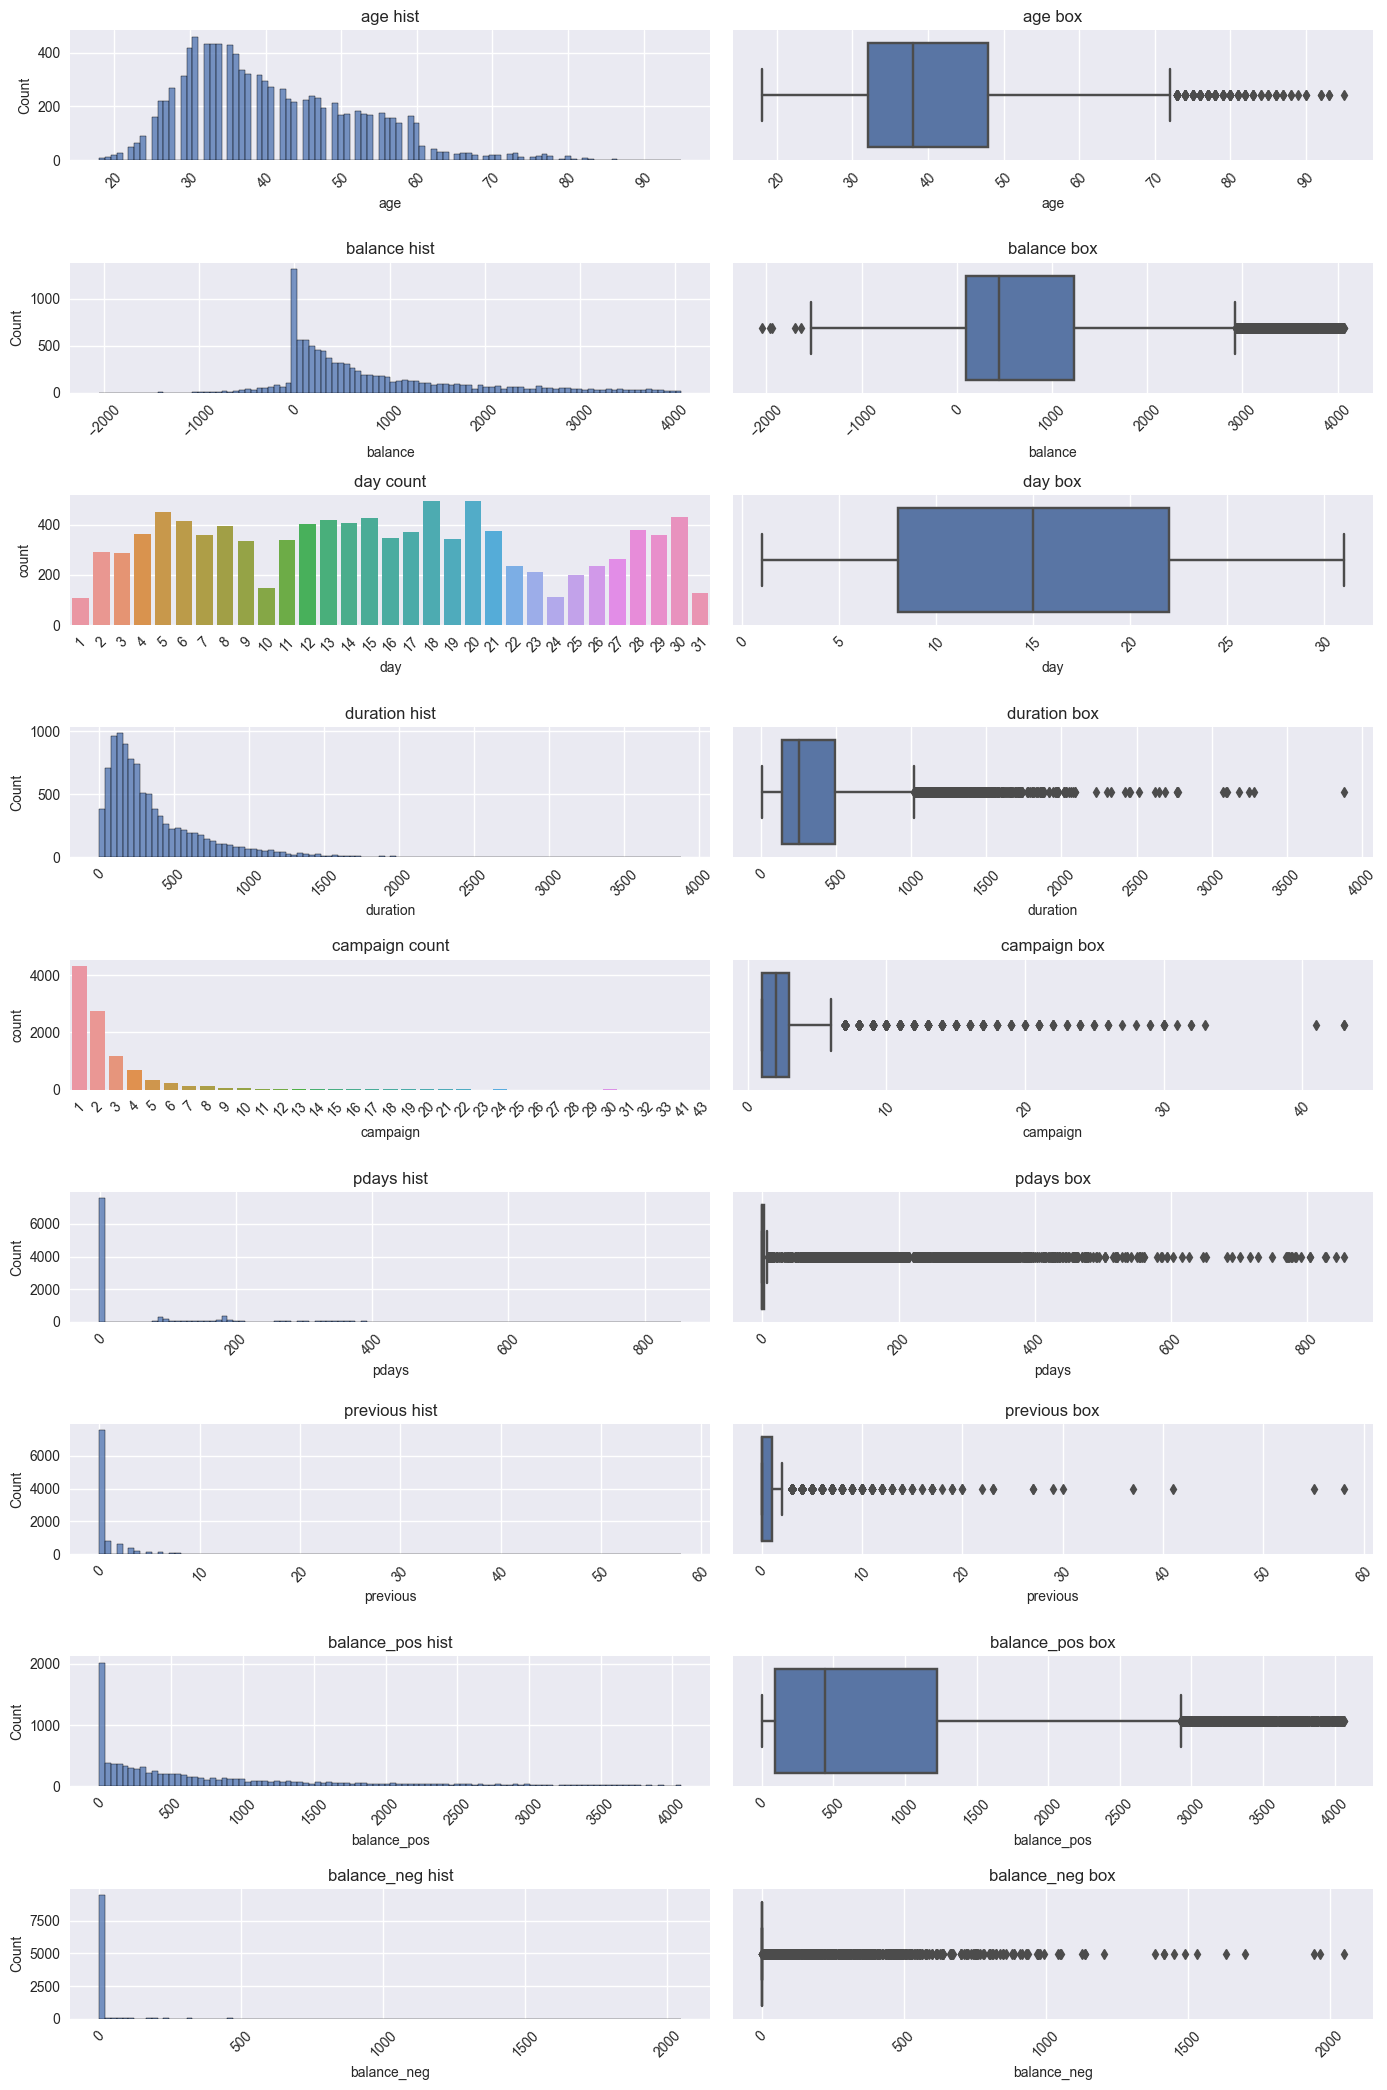

In [38]:
n = len(num_columns)
fig, axes = plt.subplots(n, 2, figsize=(14, 21))

for i, feature in enumerate(num_columns):
    if feature in count_columns:
        countplot = sns.countplot(data = df_cleaned, x = feature, ax = axes[i][0])
        countplot.set_title('{} count'.format(feature))
        countplot.xaxis.set_tick_params(rotation=45)
    
    else:
        histplot = sns.histplot(data=df_cleaned, x=feature, bins = 100, ax=axes[i][0])
        histplot.set_title('{} hist'.format(feature))
        histplot.xaxis.set_tick_params(rotation=45)
    
    boxplot = sns.boxplot(data = df_cleaned, x = feature, ax = axes[i][1])
    boxplot.set_title('{} box'.format(feature));
    boxplot.xaxis.set_tick_params(rotation=45)

plt.tight_layout()

In [39]:
pdays_bool = df_cleaned['pdays'].apply(lambda x: 'before' if x < 0 else 'now' if x==0 else 'after')

In [40]:
pdays_bool.value_counts()

before    7568
after     2537
Name: pdays, dtype: int64

Text(0.5, 1.0, 'Pdays count after boolean transformation')

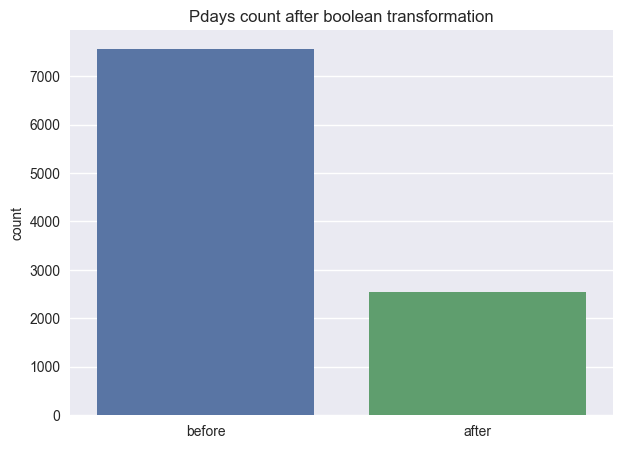

In [41]:
fig, axes = plt.subplots(figsize=(7, 5))

countplot = sns.countplot(data = pdays_bool, x = pdays_bool.values, ax = axes)

countplot.set_title('Pdays count after boolean transformation')

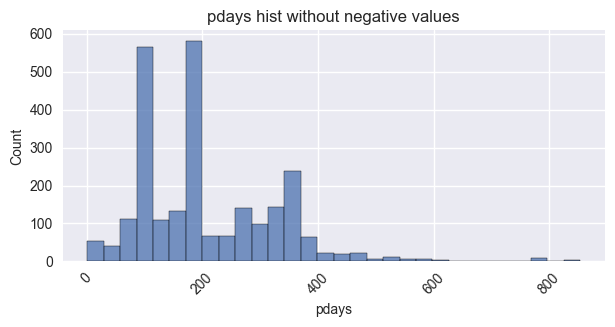

In [42]:
fig, axes = plt.subplots(figsize=(7, 3))

histplot = sns.histplot(data=df_cleaned[df_cleaned['pdays'] > 0], x='pdays', ax=axes)

histplot.set_title('pdays hist without negative values')

histplot.xaxis.set_tick_params(rotation=45)

Here we see clear pattern - 3 months, 6 months and one year before new contact.   
### Update
Let`s make new feature: pperiod, with classes:   
0 - contact without pause (negative values);   
1 - from 0 to 93 days pause;   
2 - from 94 to 186 days pause;   
3 - from 187 to 365 days pause;   
4 - more then a year pause. 

In [43]:
def pause_func(duration):
    """Function to classify pause duration size

    Args:
        duration (int): Duration of pause, days

    Returns:
        int: pause class
    """
    if duration < 0:
        return 0
    elif duration < 94:
        return 1
    elif duration < 187:
        return 2
    elif duration < 366:
        return 3
    else:
        return 4

In [44]:
df_cleaned['pperiod'] = df_cleaned['pdays'].apply(pause_func)

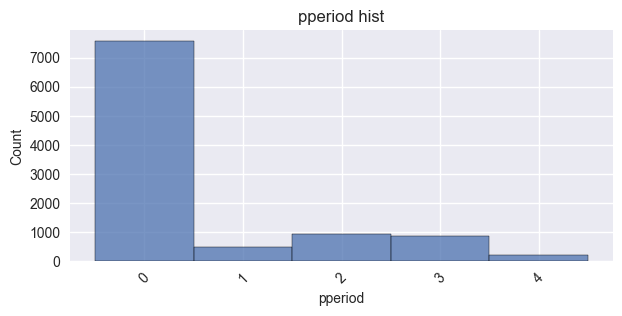

In [45]:
fig, axes = plt.subplots(figsize=(7, 3))

histplot = sns.histplot(data=df_cleaned, x='pperiod', discrete = True, ax=axes)

histplot.set_title('pperiod hist')

histplot.xaxis.set_tick_params(rotation=45)

In [46]:
del_columns.append('pdays')

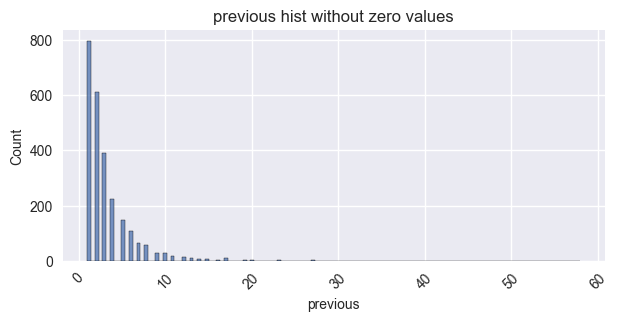

In [47]:
fig, axes = plt.subplots(figsize=(7, 3))

histplot = sns.histplot(data=df_cleaned[df_cleaned['previous'] > 0], x='previous', ax=axes)

histplot.set_title('previous hist without zero values'.format(feature))

histplot.xaxis.set_tick_params(rotation=45)

### Task 3.4, 3,5

In [48]:
cat_columns = list(df_cleaned.select_dtypes(exclude = 'number').columns)
cat_columns.remove('deposit')
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [49]:
df_cleaned[cat_columns].describe()

job  marital  education default housing   loan   contact  \
count        10105    10105      10105   10105   10105  10105     10105   
unique          11        3          3       2       2      2         3   
top     management  married  secondary      no      no     no  cellular   
freq          2315     5715       5517    9939    5243   8712      7283   

        month poutcome  
count   10105    10105  
unique     12        4  
top       may  unknown  
freq     2617     7570

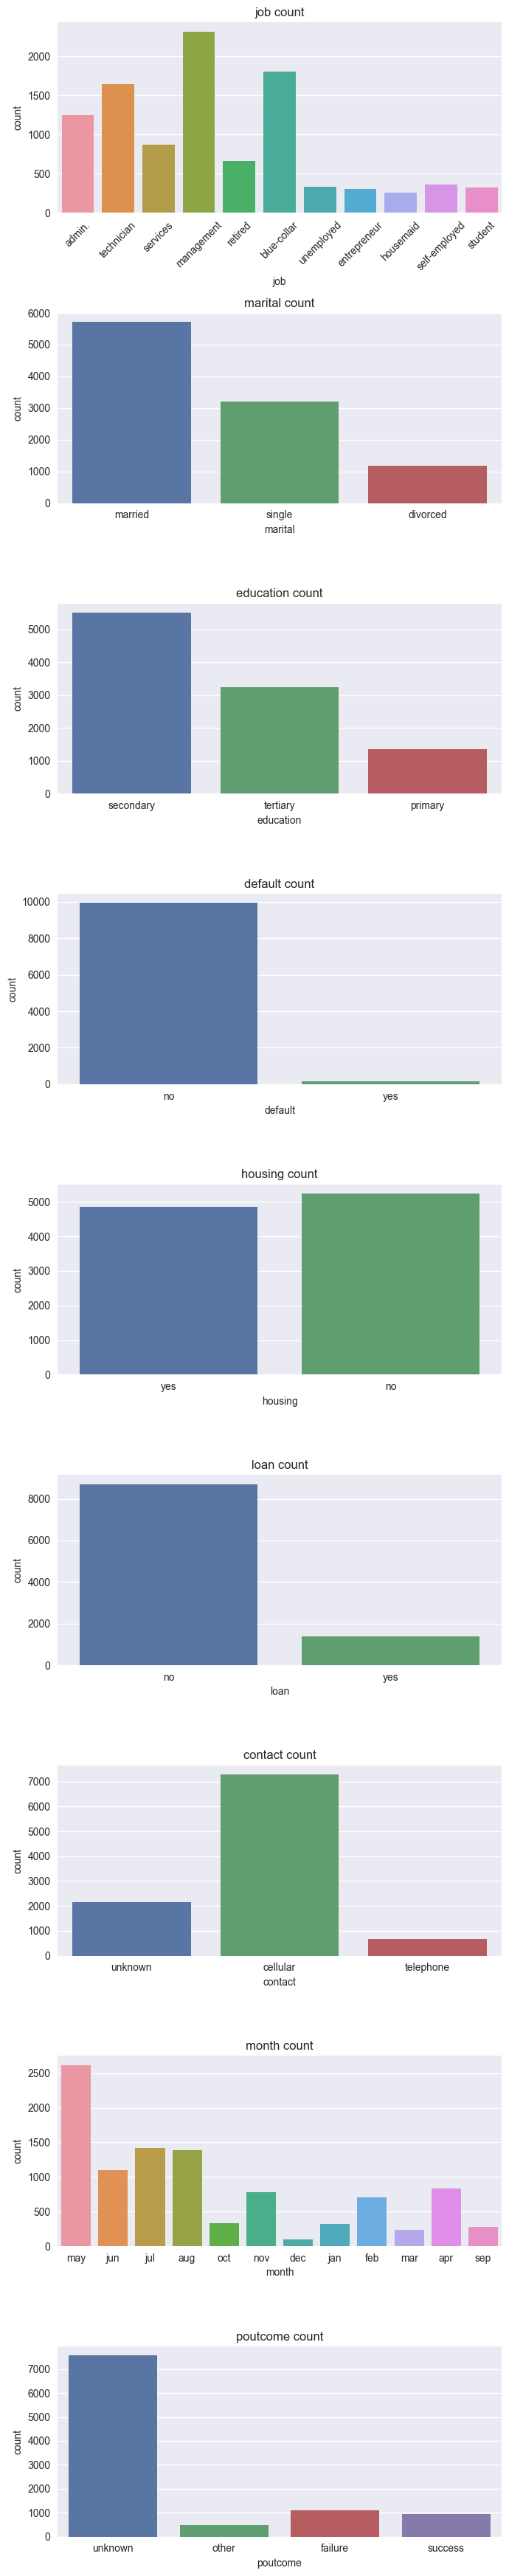

In [50]:
n = len(cat_columns) 
fig, axes = plt.subplots(n, 1, figsize=(7, 35))

for i, feature in enumerate(cat_columns):
    countplot = sns.countplot(data = df_cleaned, x = feature, ax = axes[i])
    countplot.set_title('{} count'.format(feature))
    
    if feature == 'job':
        countplot.xaxis.set_tick_params(rotation=45)
    else:
        countplot.xaxis.set_tick_params(rotation=0)    

plt.tight_layout()

### Update
Month feature could be usefull, but day feature couldn`t - yet.   
Lets try to create "day of week"-like feature.   
Lets say we have 365 days in a year, and lets start counting days from march.

In [51]:
df_cleaned['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [52]:
month_prev_days = {'mar': 0,
                   'apr': 31,
                   'may': 61,
                   'jun': 92,
                   'jul': 122,
                   'aug': 153,
                   'sep': 184,
                   'oct': 214,
                   'nov': 245,
                   'dec': 275,
                   'jan': 306,
                   'feb': 337
                   }

In [53]:
df_cleaned['dayofweek'] = (df_cleaned['day'] + df_cleaned['month'].apply(lambda x: month_prev_days[x])) % 7

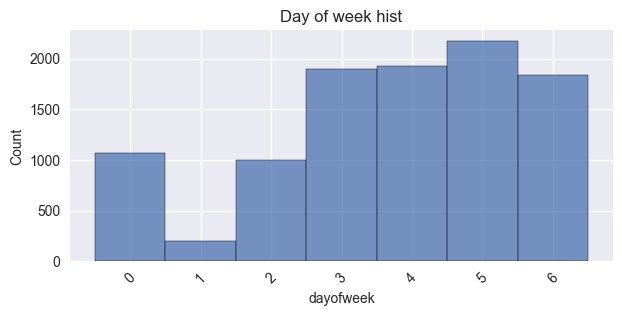

In [54]:
fig, axes = plt.subplots(figsize=(7, 3))

histplot = sns.histplot(data=df_cleaned, x='dayofweek', discrete = True, ax=axes)

histplot.set_title('Day of week hist')

histplot.xaxis.set_tick_params(rotation=45)

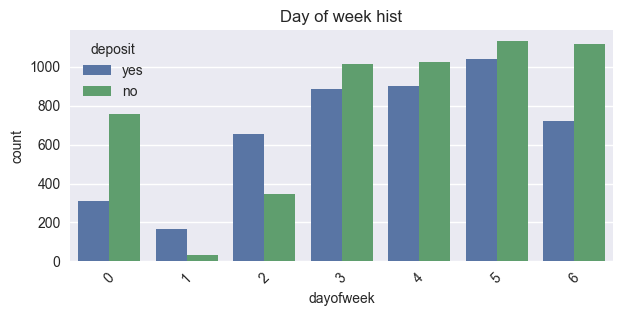

In [55]:
fig, axes = plt.subplots(figsize=(7, 3))

countplot = sns.countplot(data=df_cleaned, x='dayofweek', hue = 'deposit', ax=axes)

countplot.set_title('Day of week hist')

countplot.xaxis.set_tick_params(rotation=45)

Huge difference there!

In [56]:
del_columns.append('day')

### Task 3.6

Text(0.5, 1.0, 'Previous campaign outcome values count')

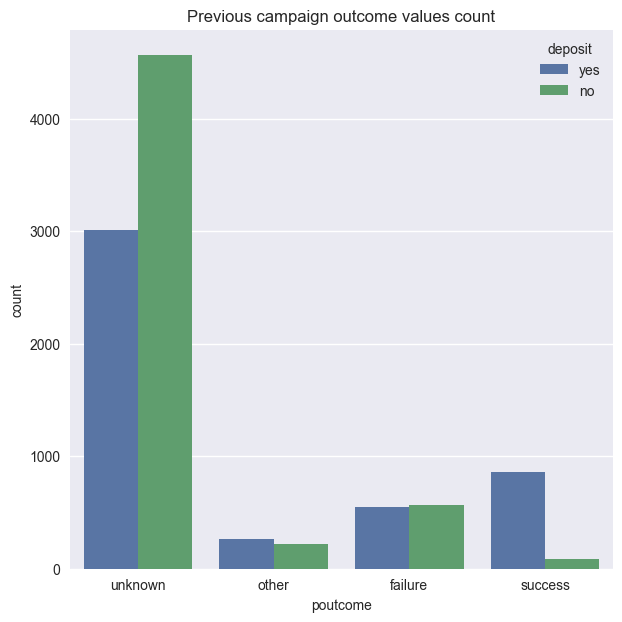

In [57]:
fig, axes = plt.subplots(figsize=(7, 7))

countplot = sns.countplot(data = df_cleaned, x = 'poutcome', hue = 'deposit', ax = axes)

countplot.set_title('Previous campaign outcome values count')

In [58]:
poutcome = df_cleaned['poutcome'].value_counts()

poutcome_group = df_cleaned.groupby('poutcome', as_index=False)['deposit'].value_counts().merge(
    poutcome,
    how = 'left',
    left_on = 'poutcome',
    right_on = poutcome.index,
    suffixes = (None, '_')
)

poutcome_group['percent'] = poutcome_group['count'] / poutcome_group['poutcome_']

poutcome_group[poutcome_group['deposit'] == 'yes'].sort_values(by = 'percent', ascending = False)

poutcome deposit  count  poutcome_   percent
4  success     yes    861        945  0.911111
2    other     yes    265        481  0.550936
1  failure     yes    547       1109  0.493237
7  unknown     yes   3008       7570  0.397358

### Task 3.7

Text(0.5, 1.0, 'Month with deposit count')

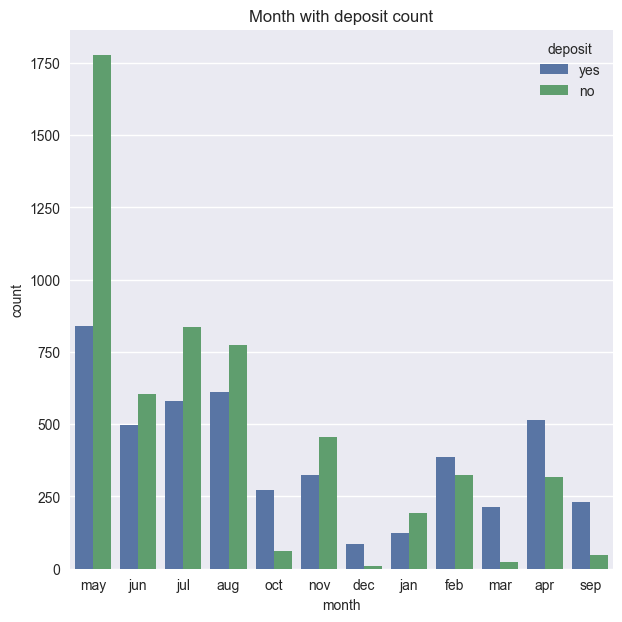

In [59]:
fig, axes = plt.subplots(figsize=(7, 7))

countplot = sns.countplot(data = df_cleaned, x = 'month', hue = 'deposit', ax = axes)

countplot.set_title('Month with deposit count')

In [60]:
month = df_cleaned['month'].value_counts()

month_group = df_cleaned.groupby('month', as_index=False)['deposit'].value_counts().merge(
    month,
    how = 'left',
    left_on = 'month',
    right_on = month.index,
    suffixes = (None, '_')
)

month_group['percent'] = month_group['count'] / month_group['month_']

month_group[month_group['deposit'] == 'no'].sort_values(by = 'percent', ascending = False)

month deposit  count  month_   percent
16   may      no   1776    2617  0.678640
8    jan      no    194     319  0.608150
10   jul      no    836    1418  0.589563
18   nov      no    456     780  0.584615
2    aug      no    775    1385  0.559567
12   jun      no    606    1104  0.548913
7    feb      no    323     709  0.455571
1    apr      no    317     830  0.381928
21   oct      no     62     335  0.185075
23   sep      no     46     278  0.165468
15   mar      no     24     237  0.101266
5    dec      no      9      93  0.096774

### Task 3.8

In [61]:
def age_func(age):
    """Function to create age groups

    Args:
        age (int): Persons age

    Returns:
        string: Age group
    """
    age_group = '60+'
    if age < 30:
        age_group = '<30'
    elif age < 40:
        age_group = '30-40'
    elif age < 50:
        age_group = '40-50'
    elif age < 60:
        age_group = '50-60'
    return age_group

In [62]:
df_cleaned['age_group'] = df_cleaned['age'].apply(age_func)

Text(0.5, 1.0, 'Age groups with deposit count')

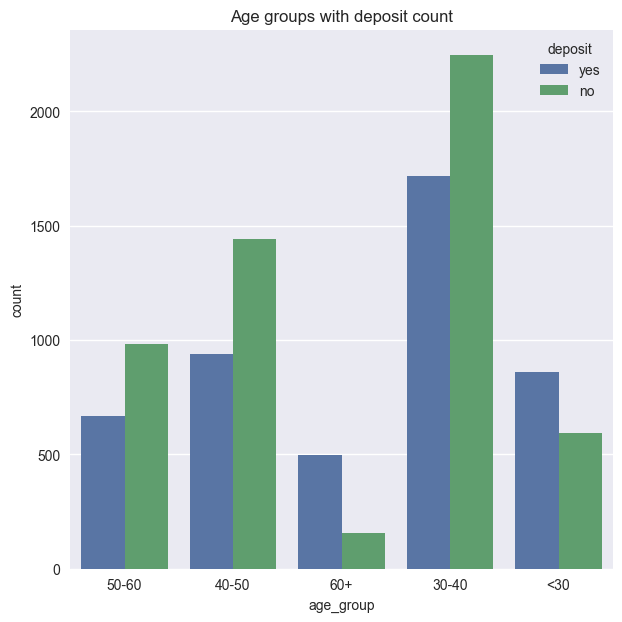

In [63]:
fig, axes = plt.subplots(figsize=(7, 7))

countplot = sns.countplot(data = df_cleaned, x = 'age_group', hue = 'deposit', ax = axes)

countplot.set_title('Age groups with deposit count')

### Task 3.9, 3.10

Text(0.5, 1.0, 'Family status with deposit count')

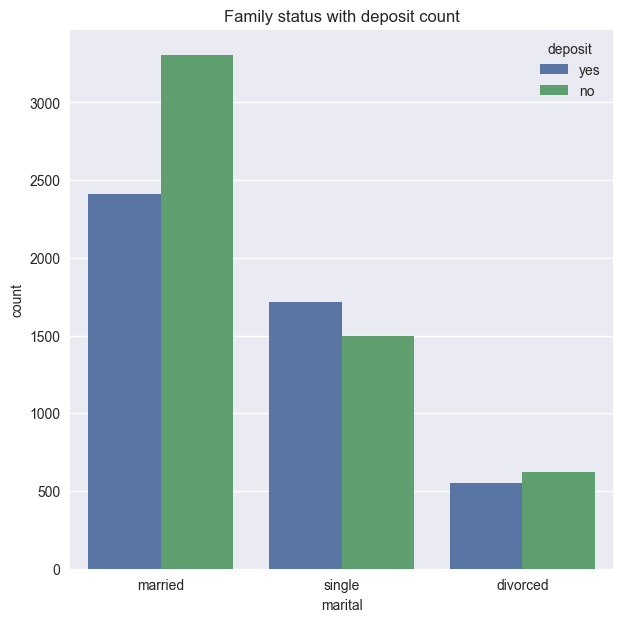

In [64]:
fig, axes = plt.subplots(figsize=(7, 7))

countplot = sns.countplot(data = df_cleaned, x = 'marital', hue = 'deposit', ax = axes)

countplot.set_title('Family status with deposit count')

Text(0.5, 1.0, 'Education status with deposit count')

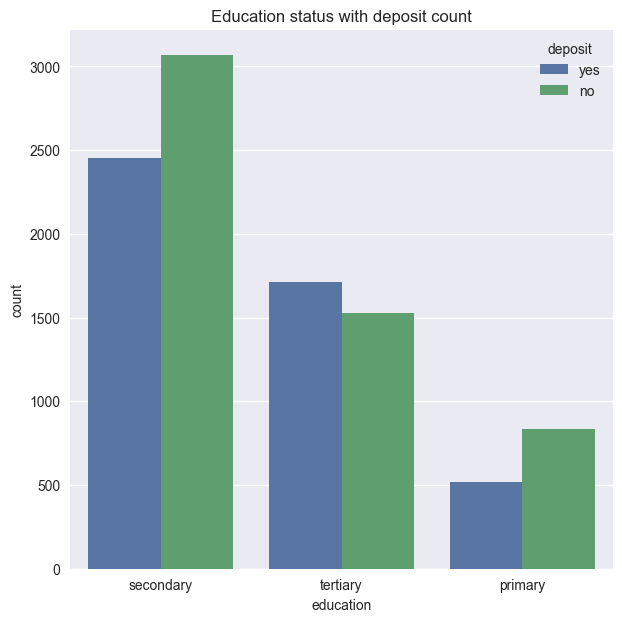

In [65]:
fig, axes = plt.subplots(figsize=(7, 7))

countplot = sns.countplot(data = df_cleaned, x = 'education', hue = 'deposit', ax = axes)

countplot.set_title('Education status with deposit count')

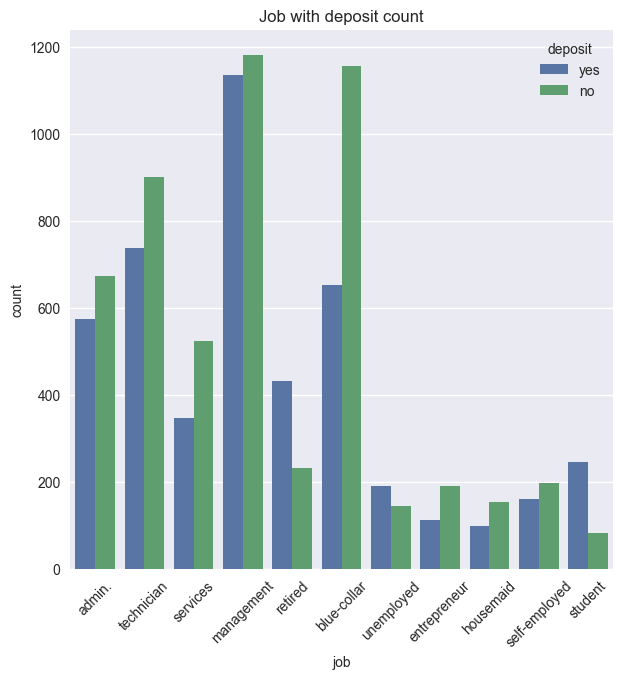

In [66]:
fig, axes = plt.subplots(figsize=(7, 7))

countplot = sns.countplot(data = df_cleaned, x = 'job', hue = 'deposit', ax = axes)

countplot.set_title('Job with deposit count')
countplot.xaxis.set_tick_params(rotation=45)


### Task 3.11

In [67]:
ed_mart_yes_pivot = df_cleaned[df_cleaned['deposit'] == 'yes'].pivot_table(
    values = 'deposit',
    index = 'marital',
    columns = 'education',
    aggfunc = 'count',
    fill_value = 0
    ).astype('int64')

In [68]:
ed_mart_yes_pivot

education  primary  secondary  tertiary
marital                                
divorced        96        283       174
married        339       1289       784
single          82        879       755

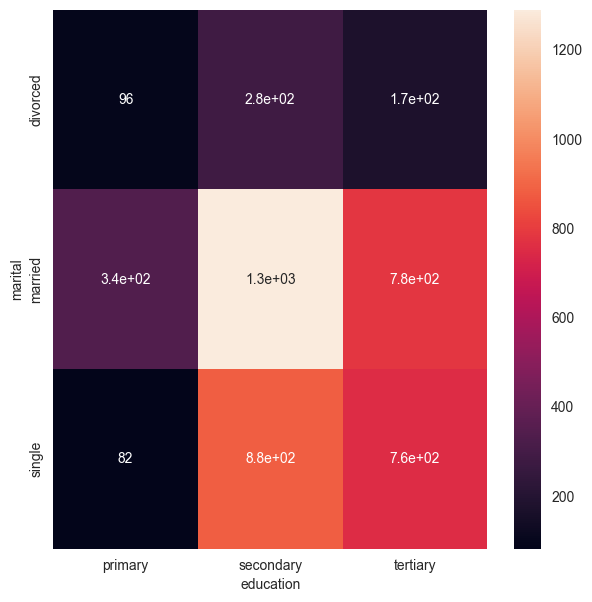

In [69]:
fig = plt.figure(figsize=(7, 7))

sns.heatmap(ed_mart_yes_pivot, annot=True);

In [70]:
ed_mart_no_pivot = df_cleaned[df_cleaned['deposit'] == 'no'].pivot_table(
    values = 'deposit',
    index = 'marital',
    columns = 'education',
    aggfunc = 'count',
    fill_value = 0
    )

In [71]:
ed_mart_no_pivot

education  primary  secondary  tertiary
marital                                
divorced        91        370       163
married        641       1830       832
single         100        866       531

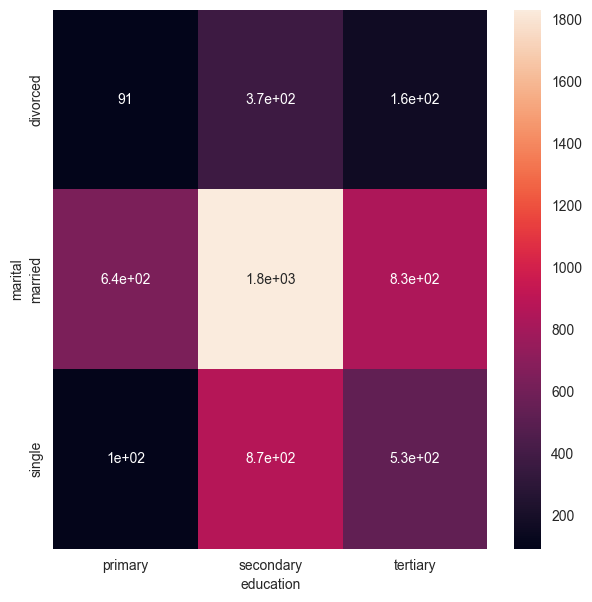

In [72]:
fig = plt.figure(figsize=(7, 7))

sns.heatmap(ed_mart_no_pivot, annot=True);

## Part 4: Data transform

### Task 4.1

In [73]:
encoder_le = LabelEncoder()
encoder_le.fit(df_cleaned['education'].unique())
df_cleaned['education_le'] = encoder_le.transform(df_cleaned['education'])

In [74]:
df_cleaned['education_le'].value_counts()

1    5517
2    3239
0    1349
Name: education_le, dtype: int64

In [75]:
df_cleaned['education_le'].sum()

11995

In [76]:
del_columns.append('education')

In [77]:
encoder_le = LabelEncoder()
encoder_le.fit(df_cleaned['age_group'].unique())
df_cleaned['age_group_le'] = encoder_le.transform(df_cleaned['age_group'])

In [78]:
df_cleaned['age_group_le'].value_counts()

0    3961
1    2382
2    1654
4    1455
3     653
Name: age_group_le, dtype: int64

In [79]:
del_columns.append('age_group')

### Task 4.2, 4.3

In [80]:
bin_columns = []
for feature in list(df_cleaned.columns):
    if df_cleaned[feature].nunique() == 2:
        bin_columns.append(feature)

bin_columns

['default', 'housing', 'loan', 'deposit']

In [81]:
for feature in bin_columns:
    df_cleaned[feature] = df_cleaned[feature].apply(lambda x: 1 if x == 'yes' else 0)

In [82]:
df_cleaned[bin_columns].describe()

default       housing          loan       deposit
count  10105.000000  10105.000000  10105.000000  10105.000000
mean       0.016428      0.481148      0.137853      0.463236
std        0.127119      0.499669      0.344762      0.498671
min        0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        0.000000      1.000000      0.000000      1.000000
max        1.000000      1.000000      1.000000      1.000000

In [83]:
round(df_cleaned['default'].mean() + df_cleaned['housing'].mean() + df_cleaned['loan'].mean(), 3)

0.635

### Task 4.4

In [84]:
dum_columns = ['job', 'marital', 'contact', 'month', 'poutcome']

df_dummies = pd.get_dummies(df_cleaned[dum_columns])

df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   job_admin.         10105 non-null  uint8
 1   job_blue-collar    10105 non-null  uint8
 2   job_entrepreneur   10105 non-null  uint8
 3   job_housemaid      10105 non-null  uint8
 4   job_management     10105 non-null  uint8
 5   job_retired        10105 non-null  uint8
 6   job_self-employed  10105 non-null  uint8
 7   job_services       10105 non-null  uint8
 8   job_student        10105 non-null  uint8
 9   job_technician     10105 non-null  uint8
 10  job_unemployed     10105 non-null  uint8
 11  marital_divorced   10105 non-null  uint8
 12  marital_married    10105 non-null  uint8
 13  marital_single     10105 non-null  uint8
 14  contact_cellular   10105 non-null  uint8
 15  contact_telephone  10105 non-null  uint8
 16  contact_unknown    10105 non-null  uint8
 17  month_apr   

In [85]:
df_cleaned = df_cleaned.join(
    df_dummies,
    how = 'left'
    )

df_cleaned.shape[1] - 1

56

Here i have two additional features thow i createв new columns for LabelEncoding result.

In [86]:
del_columns.extend(dum_columns)

### Task 4.5, 4.6

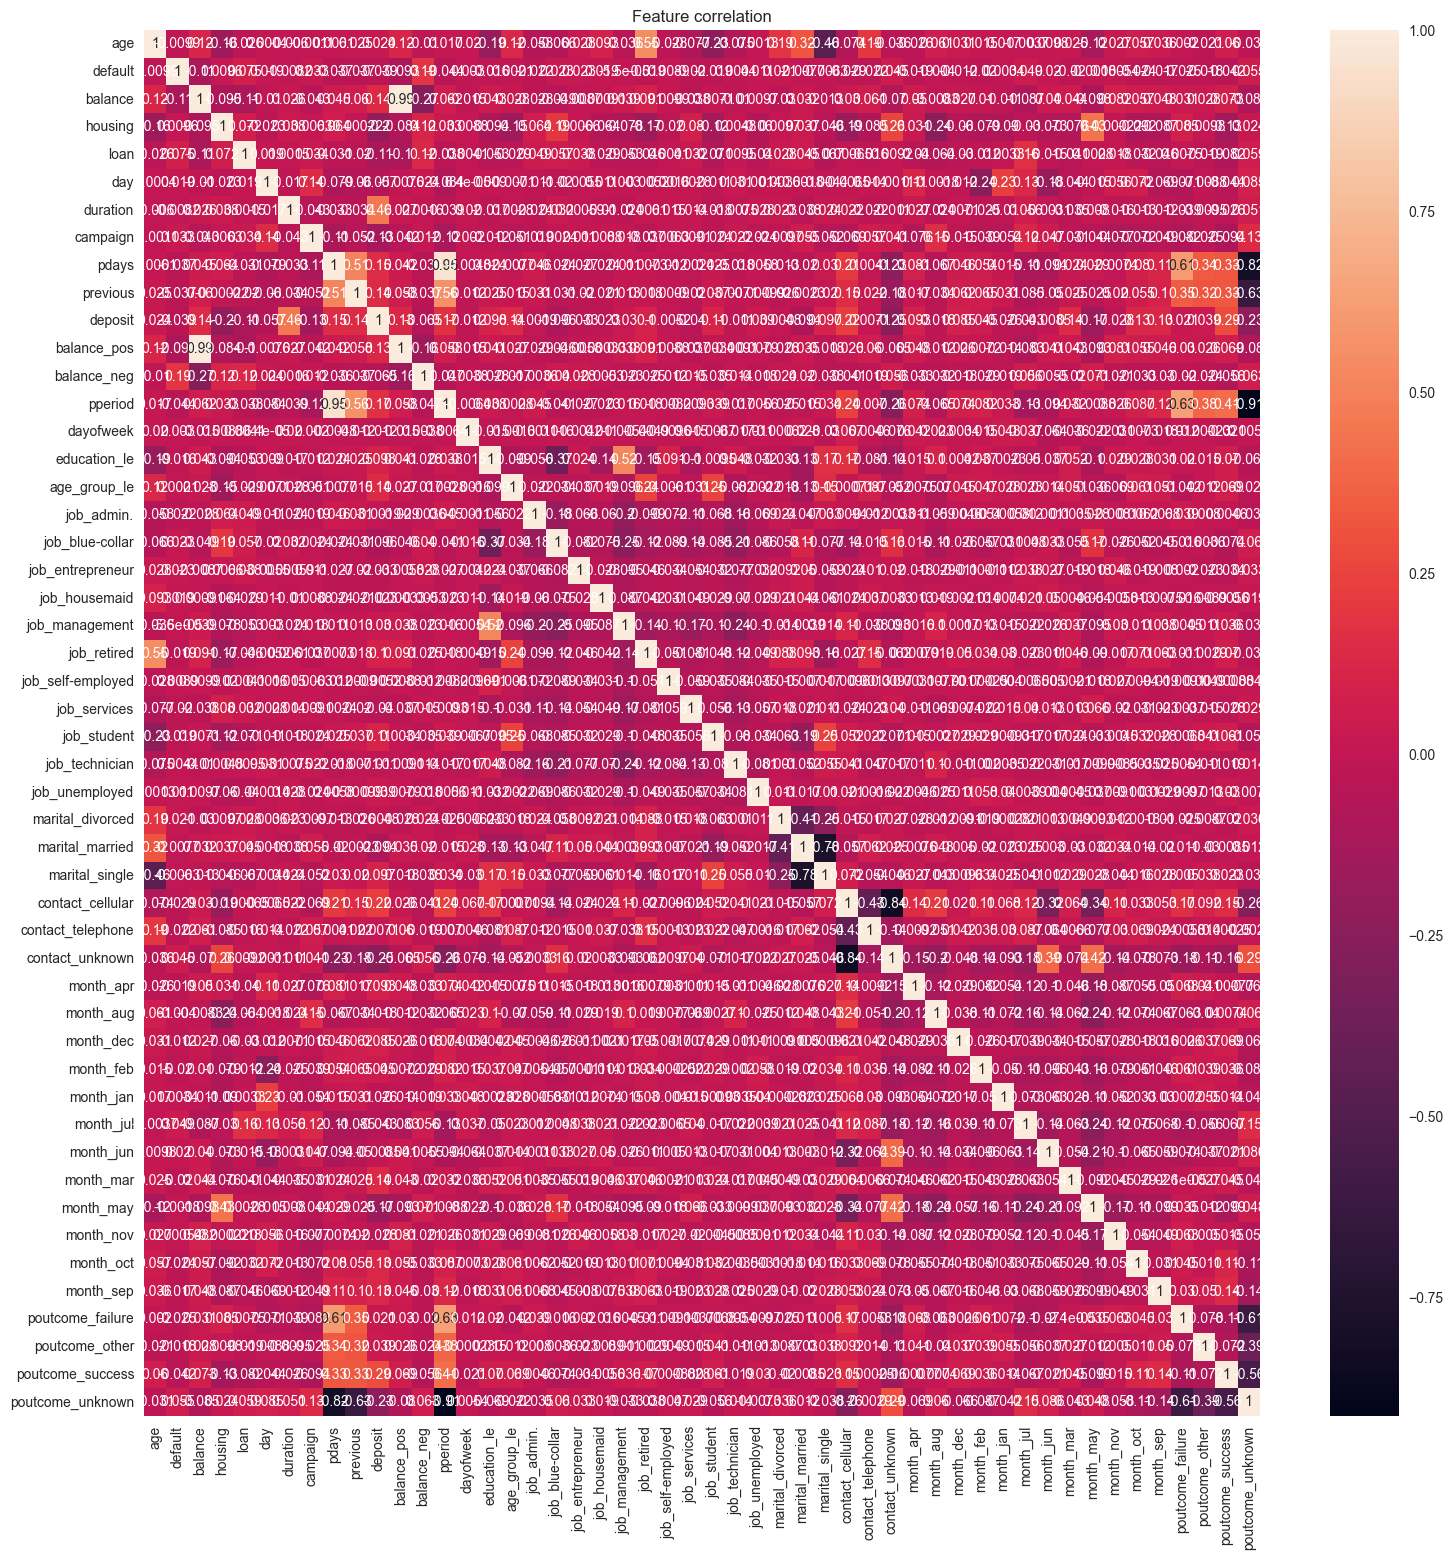

In [87]:
fig = plt.figure(figsize=(18, 18))

ax = sns.heatmap(df_cleaned.corr(numeric_only = True), annot = True)
ax.set_title("Feature correlation")
plt.xticks(rotation = 90)

plt.show()

In [88]:
df_cleaned.corr(numeric_only = True)['deposit'].sort_values(ascending=False)

deposit              1.000000
duration             0.457818
poutcome_success     0.288491
contact_cellular     0.223944
pperiod              0.173683
pdays                0.147917
previous             0.141102
age_group_le         0.136243
balance              0.135893
month_mar            0.135348
balance_pos          0.131876
month_oct            0.130599
month_sep            0.125239
job_student          0.105563
job_retired          0.100090
education_le         0.098253
marital_single       0.097005
month_apr            0.092888
month_dec            0.085041
month_feb            0.044728
poutcome_other       0.039319
job_unemployed       0.039196
job_management       0.029566
age                  0.024357
poutcome_failure     0.021124
contact_telephone    0.007064
marital_divorced     0.004808
job_admin.          -0.001927
job_self-employed   -0.005194
month_jun           -0.008533
job_technician      -0.011190
dayofweek           -0.012154
month_aug           -0.018225
job_housem

In [89]:
df_cleaned.corr(numeric_only = True)[abs(df_cleaned.corr(numeric_only = True)) >= 0.9].notna().sum().sort_values(ascending=False)

pperiod              3
pdays                2
balance_pos          2
poutcome_unknown     2
balance              2
poutcome_other       1
month_jan            1
marital_married      1
marital_single       1
contact_cellular     1
contact_telephone    1
contact_unknown      1
month_apr            1
month_aug            1
month_dec            1
month_feb            1
month_jul            1
poutcome_failure     1
month_jun            1
job_unemployed       1
month_mar            1
month_may            1
month_nov            1
poutcome_success     1
month_oct            1
month_sep            1
marital_divorced     1
age                  1
job_technician       1
default              1
housing              1
loan                 1
day                  1
duration             1
campaign             1
previous             1
deposit              1
balance_neg          1
dayofweek            1
education_le         1
age_group_le         1
job_admin.           1
job_blue-collar      1
job_entrepr

### Data cleanup

In [90]:
del_columns

['balance',
 'pdays',
 'day',
 'education',
 'age_group',
 'job',
 'marital',
 'contact',
 'month',
 'poutcome']

In [91]:
df_cleaned.drop(del_columns, axis = 1, inplace = True)

### Update
Need to check correlations once again!

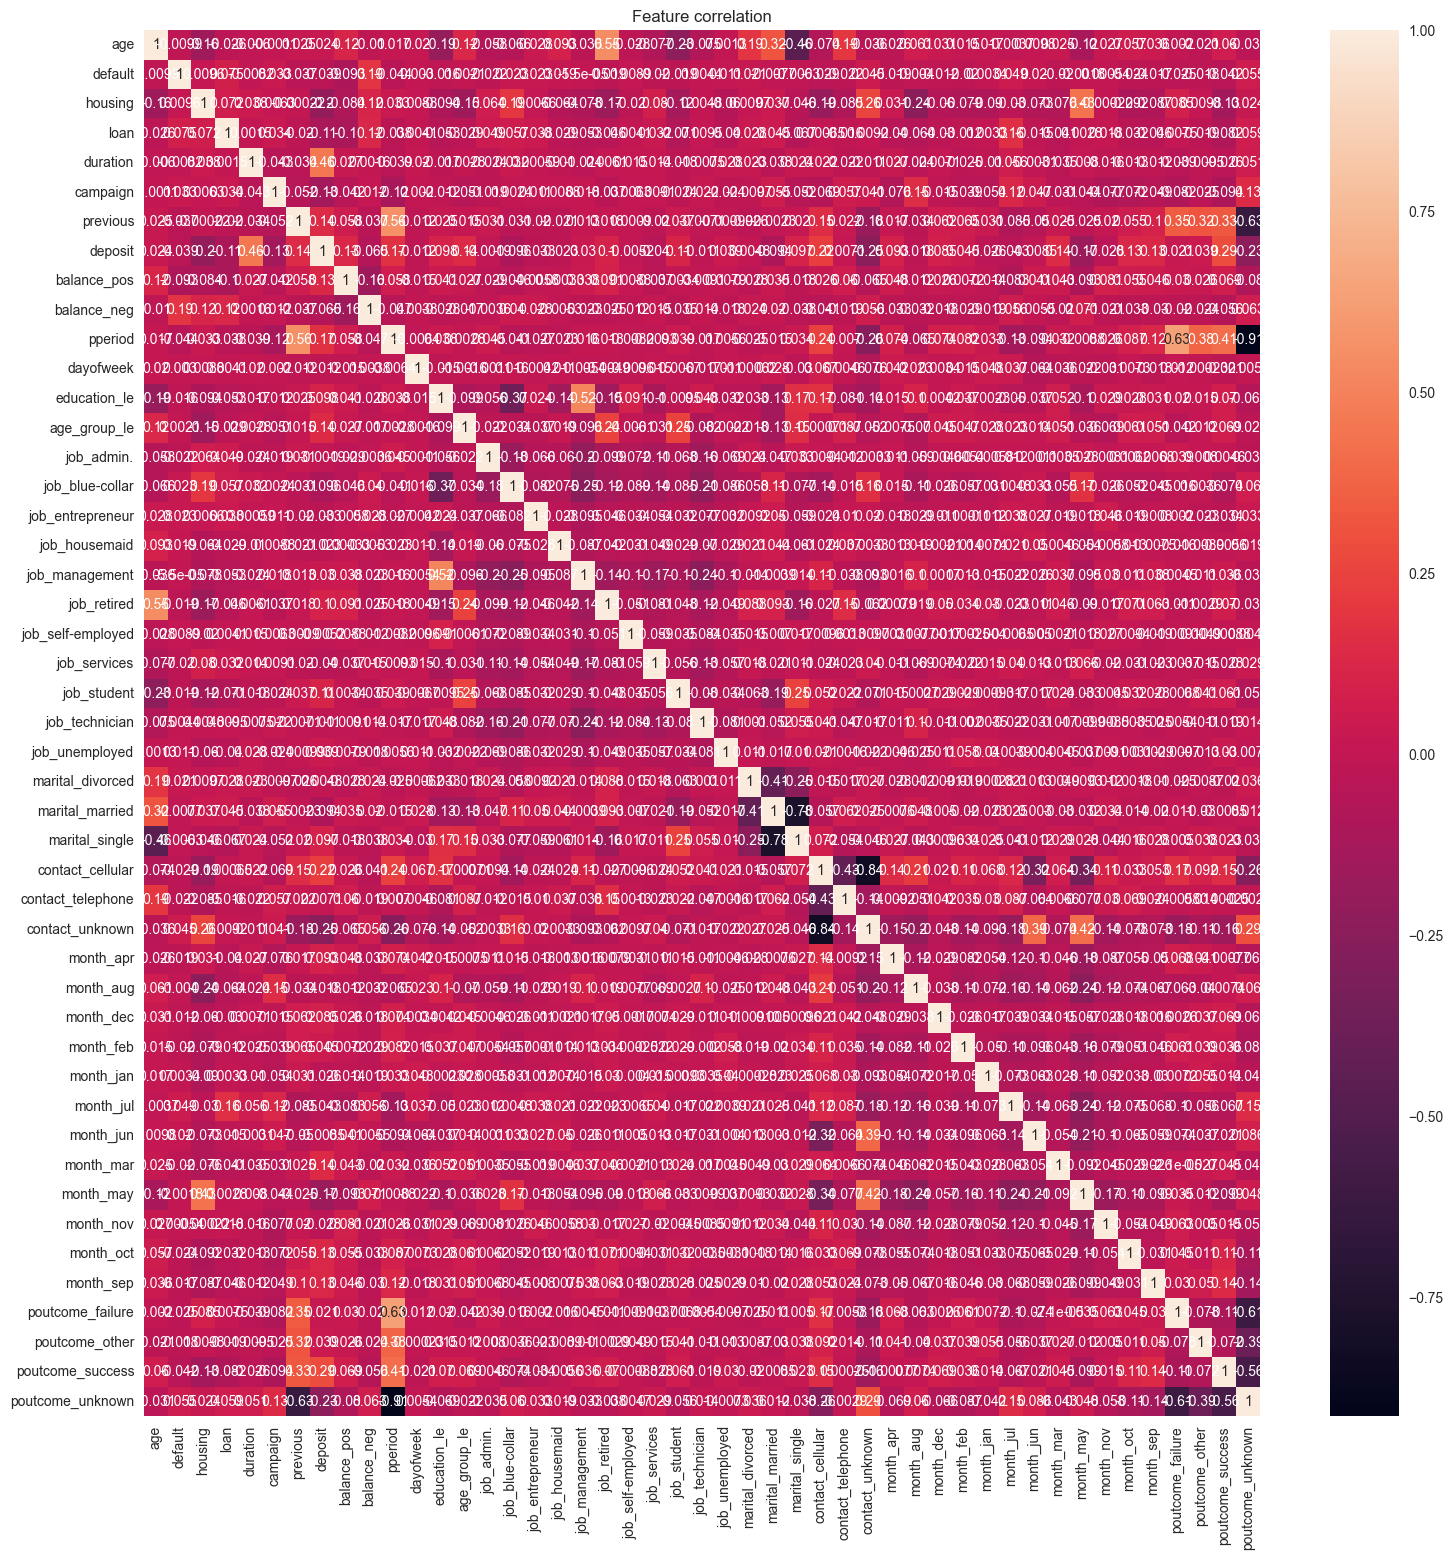

In [92]:
fig = plt.figure(figsize=(18, 18))

ax = sns.heatmap(df_cleaned.corr(numeric_only = True), annot = True)
ax.set_title("Feature correlation")
plt.xticks(rotation = 90)

plt.show()

In [93]:
df_cleaned.corr(numeric_only = True)[abs(df_cleaned.corr(numeric_only = True)) >= 0.9].notna().sum().sort_values(ascending=False)

poutcome_unknown     2
pperiod              2
month_jan            1
marital_married      1
marital_single       1
contact_cellular     1
contact_telephone    1
contact_unknown      1
month_apr            1
month_aug            1
month_dec            1
month_feb            1
month_jul            1
job_unemployed       1
month_jun            1
month_mar            1
month_may            1
month_nov            1
month_oct            1
month_sep            1
poutcome_failure     1
poutcome_other       1
poutcome_success     1
marital_divorced     1
age                  1
default              1
job_student          1
housing              1
loan                 1
duration             1
campaign             1
previous             1
deposit              1
balance_pos          1
balance_neg          1
dayofweek            1
education_le         1
age_group_le         1
job_admin.           1
job_blue-collar      1
job_entrepreneur     1
job_housemaid        1
job_management       1
job_retired

pperiod and poutcome_unknown features are highly correlated. It`s natural because previous campaign outcome was left unknown for customers which were involved in new campaign before old one ends. One feature should be deleted.

In [94]:
df_cleaned.drop('pperiod', axis = 1, inplace = True)

In [95]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10105 entries, 0 to 11161
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                10105 non-null  int64  
 1   default            10105 non-null  int64  
 2   housing            10105 non-null  int64  
 3   loan               10105 non-null  int64  
 4   duration           10105 non-null  int64  
 5   campaign           10105 non-null  int64  
 6   previous           10105 non-null  int64  
 7   deposit            10105 non-null  int64  
 8   balance_pos        10105 non-null  float64
 9   balance_neg        10105 non-null  float64
 10  dayofweek          10105 non-null  int64  
 11  education_le       10105 non-null  int32  
 12  age_group_le       10105 non-null  int32  
 13  job_admin.         10105 non-null  uint8  
 14  job_blue-collar    10105 non-null  uint8  
 15  job_entrepreneur   10105 non-null  uint8  
 16  job_housemaid      101

### Task 4.7, 4.8

In [96]:
X = df_cleaned.drop(['deposit'], axis=1)
y = df_cleaned['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [97]:
X_test.shape

(3335, 45)

In [98]:
y_test.mean()

0.46326836581709147

### Task 4.9

In [99]:
selector = SelectKBest(f_classif, k=20)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['housing', 'loan', 'duration', 'campaign', 'previous',
       'balance_pos', 'education_le', 'age_group_le', 'job_blue-collar',
       'job_retired', 'job_student', 'contact_cellular',
       'contact_unknown', 'month_apr', 'month_mar', 'month_may',
       'month_oct', 'month_sep', 'poutcome_success', 'poutcome_unknown'],
      dtype=object)

previous result, with 15 features, before actions marked 'update':   
array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group_le', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [100]:
X_train_select = X_train[selector.get_feature_names_out()].copy()
X_test_select = X_test[selector.get_feature_names_out()].copy()

### Task 4.10

In [101]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train_select)

X_train_scaled = mm_scaler.transform(X_train_select)
X_test_scaled = mm_scaler.transform(X_test_select)

In [102]:
np.mean(X_test_scaled, axis=0)[0]

0.4848575712143928

In [103]:
X_test_scaled[:,0].mean()

0.4848575712143928

# Part 5. Classification task solving: logistic regression and decision trees.

### Task 5.1

In [104]:
start = time.time()

log_reg = LogisticRegression(
    penalty= None,
    solver = 'sag',
    max_iter = 1000,
    random_state = 42
    )

log_reg.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = log_reg.predict(X_train_scaled)
print('accuracy on train data: {:.2f}'.format(accuracy_score(y_train_pred, y_train)))
y_test_pred = log_reg.predict(X_test_scaled)
print('accuracy on test data: {:.2f}'.format(accuracy_score(y_test_pred, y_test)))

print('Metrics on train data:')
print(classification_report(y_train, y_train_pred))
print('Metrics on test data:')
print(classification_report(y_test, y_test_pred))

Learning time: 0.043005943298339844
accuracy on train data: 0.84
accuracy on test data: 0.82
Metrics on train data:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      3634
           1       0.84      0.80      0.82      3136

    accuracy                           0.84      6770
   macro avg       0.84      0.83      0.83      6770
weighted avg       0.84      0.84      0.83      6770

Metrics on test data:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1790
           1       0.82      0.77      0.80      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.81      0.81      3335
weighted avg       0.82      0.82      0.81      3335



### Tasks 5.2, 5.3, 5.4

In [105]:
start = time.time()

dtc = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 42
    )

dtc.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = dtc.predict(X_train_scaled)
print('accuracy on train data: {:.2f}'.format(accuracy_score(y_train_pred, y_train)))
y_test_pred = dtc.predict(X_test_scaled)
print('accuracy on test data: {:.2f}'.format(accuracy_score(y_test_pred, y_test)))

print('Metrics on train data:')
print(classification_report(y_train, y_train_pred))
print('Metrics on test data:')
print(classification_report(y_test, y_test_pred))

Learning time: 0.03170323371887207
accuracy on train data: 1.00
accuracy on test data: 0.75
Metrics on train data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3634
           1       1.00      1.00      1.00      3136

    accuracy                           1.00      6770
   macro avg       1.00      1.00      1.00      6770
weighted avg       1.00      1.00      1.00      6770

Metrics on test data:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1790
           1       0.73      0.73      0.73      1545

    accuracy                           0.75      3335
   macro avg       0.75      0.75      0.75      3335
weighted avg       0.75      0.75      0.75      3335



Learning time: 0.10913729667663574


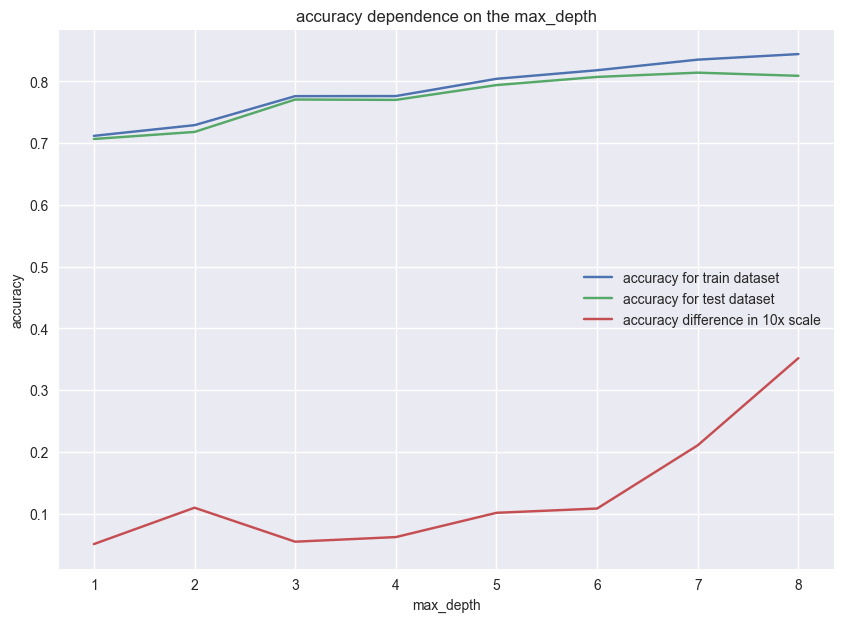

In [106]:
accuracy_train = []
accuracy_test = []
diff_list = []
depth_list = []

depth = 1

start = time.time()

while True:
    dtc = DecisionTreeClassifier(
        max_depth = depth,
        criterion = 'entropy',
        random_state = 42
        )
    dtc.fit(X_train_scaled, y_train)
    
    y_train_pred = dtc.predict(X_train_scaled)
    accuracy_train.append(accuracy_score(y_train_pred, y_train))
    y_test_pred = dtc.predict(X_test_scaled)
    accuracy_test.append(accuracy_score(y_test_pred, y_test))
    depth_list.append(depth)
    diff_list.append((accuracy_score(y_train_pred, y_train) - accuracy_score(y_test_pred, y_test)) * 10)
    
    depth += 1
    if len(depth_list) <= 4:
        continue
    elif (accuracy_test[-1] < accuracy_test[-2]) and (accuracy_train[-1] > accuracy_train[-2]):
        break

print('Learning time: {}'.format(time.time() - start))

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(depth_list, accuracy_train, label='accuracy for train dataset')

ax.plot(depth_list, accuracy_test, label='accuracy for test dataset')

ax.plot(depth_list, diff_list, label='accuracy difference in 10x scale')

ax.set_title('accuracy dependence on the max_depth')
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy')
ax.legend();

In [121]:
accuracy_test

[0.7064467766116942,
 0.7178410794602699,
 0.7703148425787106,
 0.7697151424287856,
 0.7937031484257872,
 0.8068965517241379,
 0.8137931034482758,
 0.808695652173913]

In [107]:
print('Max depth and accuracy before incrasing the difference of metrics')

display(depth_list[-3])
display(round(accuracy_train[-3],2))
display(round(accuracy_test[-3],2))

Max depth and accuracy before incrasing the difference of metrics


6

0.82

0.81

### Task 5.5

In [108]:
param_grid = [{'min_samples_split': [2, 5, 7, 10],
              'max_depth': [3, 5, 7]
              }]

dtc = DecisionTreeClassifier(
    criterion = 'entropy',
    random_state = 42
    )

grid_search = GridSearchCV(
    estimator = dtc,
    param_grid = param_grid,
    scoring = 'f1',
    n_jobs = -1
    )

start = time.time()
  
grid_search.fit(X_train_scaled, y_train)

print('Optimisation time: {}'.format(time.time() - start))
print("Best parameters:\n{}".format(grid_search.best_params_))

Optimisation time: 3.621990442276001
Best parameters:
{'max_depth': 7, 'min_samples_split': 10}


In [109]:
start = time.time()

dtc_opt = DecisionTreeClassifier(**grid_search.best_params_,
                                 criterion = 'entropy',
                                 random_state = 42
                                 )

dtc_opt.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = dtc_opt.predict(X_train_scaled)
print('f1_score on train data: {:.2f}'.format(f1_score(y_train, y_train_pred)))
y_test_pred = dtc_opt.predict(X_test_scaled)
print('f1_score on test data: {:.2f}'.format(f1_score(y_test, y_test_pred)))

Learning time: 0.016023635864257812
f1_score on train data: 0.82
f1_score on test data: 0.80


# Part 6. Classification task solving: ensembles of models and forecasting

### Task 6.1

In [110]:
start = time.time()

rf = RandomForestClassifier(
    n_estimators = 100,
    criterion = 'gini',
    min_samples_leaf = 5,
    max_depth = 10,
    random_state = 42
    )

rf.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = rf.predict(X_train_scaled)
print('accuracy on train data: {:.2f}'.format(accuracy_score(y_train_pred, y_train)))
y_test_pred = rf.predict(X_test_scaled)
print('accuracy on test data: {:.2f}'.format(accuracy_score(y_test_pred, y_test)))

print('Metrics on train data:')
print(classification_report(y_train, y_train_pred))
print('Metrics on test data:')
print(classification_report(y_test, y_test_pred))

Learning time: 0.47414517402648926
accuracy on train data: 0.86
accuracy on test data: 0.84
Metrics on train data:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3634
           1       0.84      0.87      0.85      3136

    accuracy                           0.86      6770
   macro avg       0.86      0.86      0.86      6770
weighted avg       0.86      0.86      0.86      6770

Metrics on test data:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1790
           1       0.81      0.84      0.83      1545

    accuracy                           0.84      3335
   macro avg       0.83      0.84      0.83      3335
weighted avg       0.84      0.84      0.84      3335



### Tasks 6.2, 6.3

In [111]:
start = time.time()

gbc = GradientBoostingClassifier(
    learning_rate = 0.05,
    n_estimators = 300,
    min_samples_leaf = 5,
    max_depth = 5,
    random_state = 42
    )


gbc.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = gbc.predict(X_train_scaled)
print('f1 score on train data: {:.2f}'.format(f1_score(y_train_pred, y_train)))
y_test_pred = gbc.predict(X_test_scaled)
print('f1 score on test data: {:.2f}'.format(f1_score(y_test_pred, y_test)))

print('Metrics on train data:')
print(classification_report(y_train, y_train_pred))
print('Metrics on test data:')
print(classification_report(y_test, y_test_pred))

Learning time: 3.2627885341644287
f1 score on train data: 0.88
f1 score on test data: 0.82
Metrics on train data:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3634
           1       0.87      0.89      0.88      3136

    accuracy                           0.89      6770
   macro avg       0.89      0.89      0.89      6770
weighted avg       0.89      0.89      0.89      6770

Metrics on test data:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1790
           1       0.81      0.84      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Task 6.4

In [112]:
estimators = [
    ('dtc', DecisionTreeClassifier(criterion = 'entropy',
                                   min_samples_leaf = 5,
                                   max_depth = 6,
                                   random_state = 42
                                   )),
    ('log_reg', LogisticRegression(penalty= None,
                                   solver = 'sag',
                                   random_state = 42
                                   )),
    ('gbc', GradientBoostingClassifier(learning_rate = 0.05,
                                       n_estimators = 300,
                                       min_samples_leaf = 5,
                                       max_depth = 5,
                                       random_state = 42
                                       ))
    ]

stack_class = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42)
)

start = time.time()

stack_class.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = stack_class.predict(X_train_scaled)

y_test_pred = stack_class.predict(X_test_scaled)

print('Metrics on train data:')
print(classification_report(y_train, y_train_pred))
print('Metrics on test data:')
print(classification_report(y_test, y_test_pred))

Learning time: 16.879300117492676
Metrics on train data:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3634
           1       0.86      0.86      0.86      3136

    accuracy                           0.87      6770
   macro avg       0.87      0.87      0.87      6770
weighted avg       0.87      0.87      0.87      6770

Metrics on test data:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1790
           1       0.81      0.82      0.82      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.83      0.83      0.83      3335



### Task 6.5

In [113]:
gbc.feature_importances_

array([0.05237674, 0.00960172, 0.49643564, 0.01541024, 0.03574263,
       0.05618581, 0.00579659, 0.03627426, 0.00245593, 0.00265643,
       0.00164606, 0.00384369, 0.07203568, 0.01666128, 0.0270516 ,
       0.01478759, 0.02007292, 0.01423767, 0.11355342, 0.00317412])

In [114]:
feat_importances = pd.Series(gbc.feature_importances_, index=X_test_select.columns)
feat_importances.nlargest(10)

duration            0.496436
poutcome_success    0.113553
contact_unknown     0.072036
balance_pos         0.056186
housing             0.052377
age_group_le        0.036274
previous            0.035743
month_mar           0.027052
month_oct           0.020073
month_apr           0.016661
dtype: float64

### Tasks 6.6, 6.7, 6.8

In [115]:
def optuna_rf(trial):
    """Function to optimize with optuna algorithm

    Args:
        trial (optuna.trial): a single execution of the objective function

    Returns:
        float: f1 score
    """
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)
    
    model = RandomForestClassifier(
        n_estimators = n_estimators,
        min_samples_leaf = min_samples_leaf,
        max_depth = max_depth,
        random_state = 42
        )
    
    model.fit(X_train_scaled, y_train)
  
    score = f1_score(y_train, model.predict(X_train_scaled))
  
    return score    

In [116]:
start = time.time()

study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")

study.optimize(optuna_rf, n_trials=20)

print('Optimisation time: {}'.format(time.time() - start))

[I 2023-03-03 07:51:37,733] A new study created in memory with name: RandomForestClassifier
[I 2023-03-03 07:51:38,624] Trial 0 finished with value: 0.856610222153177 and parameters: {'n_estimators': 165, 'max_depth': 23, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.856610222153177.
[I 2023-03-03 07:51:39,634] Trial 1 finished with value: 0.8890971571383942 and parameters: {'n_estimators': 163, 'max_depth': 17, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.8890971571383942.
[I 2023-03-03 07:51:40,524] Trial 2 finished with value: 0.872506234413965 and parameters: {'n_estimators': 150, 'max_depth': 14, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8890971571383942.
[I 2023-03-03 07:51:41,141] Trial 3 finished with value: 0.8569647865378623 and parameters: {'n_estimators': 113, 'max_depth': 17, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.8890971571383942.
[I 2023-03-03 07:51:41,901] Trial 4 finished with value: 0.8566963588060634 and parameters: {'n_est

Optimisation time: 16.92565131187439


In [117]:
print("Best parameters: {}".format(study.best_params))

Best parameters: {'n_estimators': 121, 'max_depth': 27, 'min_samples_leaf': 2}


In [118]:
print("Best f1 score: {}".format(study.best_value))

Best f1 score: 0.9279448621553884


In [119]:
start = time.time()

rf_opt = RandomForestClassifier(
    **study.best_params,
    random_state = 42)

rf_opt.fit(X_train_scaled, y_train)

print('Learning time: {}'.format(time.time() - start))

y_train_pred = rf_opt.predict(X_train_scaled)
print('f1_score on train data: {:.2f}'.format(f1_score(y_train, y_train_pred)))
y_test_pred = rf_opt.predict(X_test_scaled)
print('f1_score on test data: {:.2f}'.format(f1_score(y_test, y_test_pred)))

Learning time: 0.7037465572357178
f1_score on train data: 0.93
f1_score on test data: 0.83


In [120]:
print('f1_score on test data: {:.3f}'.format(f1_score(y_test, y_test_pred)))
print('accuracy on test data: {:.3f}'.format(accuracy_score(y_test, y_test_pred)))

f1_score on test data: 0.828
accuracy on test data: 0.836


In [121]:
print('Metrics on test data:')
print(classification_report(y_test, y_test_pred))

Metrics on test data:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1790
           1       0.81      0.85      0.83      1545

    accuracy                           0.84      3335
   macro avg       0.84      0.84      0.84      3335
weighted avg       0.84      0.84      0.84      3335



In [122]:
feat_importances_rf = pd.Series(rf_opt.feature_importances_, index=X_test_select.columns)
feat_importances_rf.nlargest(10)

duration            0.471601
balance_pos         0.101894
poutcome_success    0.057209
age_group_le        0.051698
campaign            0.042511
previous            0.037239
housing             0.036636
contact_unknown     0.025934
poutcome_unknown    0.022353
contact_cellular    0.021761
dtype: float64

### Conclusion
The simulation results allowed us to determine the most important qualities of a potential client.   
At the same time, we should not attribute the duration of the conversation to such qualities. On the other hand, the presence of a savings account and the amount on it, a positive decision within the past company, the age group of a potential client, the number of contacts with a client, whether he has a mortgage and a number of other factors allow us to accurately outline the target audience.   
Also, the analysis points to the strategic and tactical mistakes of past companies. For example, it can be said that starting a new marketing campaign too early creates a negative impression on the client, often preventing him from making a decision on the old one. If you pay attention to the analytics of the days of the week, you can see the obvious - calling and writing to clients on weekdays is not the most effective idea.